# ความท้าทาย: วิเคราะห์ข้อความเกี่ยวกับวิทยาศาสตร์ข้อมูล

> *ในโน้ตบุ๊กนี้ เราจะทดลองใช้ URL ต่าง ๆ - บทความในวิกิพีเดียเกี่ยวกับการเรียนรู้ของเครื่อง คุณจะเห็นว่า บทความนี้มีคำศัพท์เฉพาะจำนวนมาก ซึ่งแตกต่างจากวิทยาศาสตร์ข้อมูล ทำให้การวิเคราะห์มีความยุ่งยากมากขึ้น เราจำเป็นต้องหาวิธีใหม่ในการทำความสะอาดข้อมูลหลังจากการดึงคำสำคัญ เพื่อกำจัดคำหรือวลีที่ปรากฏบ่อยแต่ไม่มีความหมายออกไป*

ในตัวอย่างนี้ เรามาลองทำแบบฝึกหัดง่าย ๆ ที่ครอบคลุมทุกขั้นตอนของกระบวนการวิทยาศาสตร์ข้อมูลแบบดั้งเดิม คุณไม่จำเป็นต้องเขียนโค้ดใด ๆ เพียงแค่คลิกที่เซลล์ด้านล่างเพื่อรันและสังเกตผลลัพธ์ ในฐานะความท้าทาย คุณได้รับการสนับสนุนให้ลองใช้โค้ดนี้กับข้อมูลที่แตกต่างกัน

## เป้าหมาย

ในบทเรียนนี้ เราได้พูดคุยเกี่ยวกับแนวคิดต่าง ๆ ที่เกี่ยวข้องกับวิทยาศาสตร์ข้อมูล ลองค้นหาแนวคิดที่เกี่ยวข้องเพิ่มเติมโดยการทำ **การทำเหมืองข้อความ** เราจะเริ่มต้นด้วยข้อความเกี่ยวกับวิทยาศาสตร์ข้อมูล ดึงคำสำคัญออกมา และลองแสดงผลลัพธ์ในรูปแบบภาพ

สำหรับข้อความ เราจะใช้หน้าบทความเกี่ยวกับวิทยาศาสตร์ข้อมูลจากวิกิพีเดีย:


In [2]:
url = 'https://en.wikipedia.org/wiki/Data_science'
url = 'https://en.wikipedia.org/wiki/Machine_learning'

## ขั้นตอนที่ 1: การดึงข้อมูล

ขั้นตอนแรกในกระบวนการวิทยาศาสตร์ข้อมูลคือการดึงข้อมูล เราจะใช้ไลบรารี `requests` เพื่อทำสิ่งนี้:


In [3]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Machine learning - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"77162785-16e9-4d7f-a175-7f3fcf502a66","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Machine_learning","wgTitle":"Machine learning","wgCurRevisionId":1041247229,"wgRevisionId":1041247229,"wgArticleId":233488,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","Harv and Sfn no-target errors","CS1 maint: uses authors parameter","Articles with short description","Short description is dif

## ขั้นตอนที่ 2: การแปลงข้อมูล

ขั้นตอนถัดไปคือการแปลงข้อมูลให้อยู่ในรูปแบบที่เหมาะสมสำหรับการประมวลผล ในกรณีนี้ เราได้ดาวน์โหลดซอร์สโค้ด HTML จากหน้าเว็บมาแล้ว และเราจำเป็นต้องแปลงมันให้เป็นข้อความธรรมดา

มีหลายวิธีที่สามารถทำได้ เราจะใช้ [HTMLParser](https://docs.python.org/3/library/html.parser.html) ซึ่งเป็นออบเจกต์ที่มีอยู่ใน Python อยู่แล้ว วิธีนี้ง่ายที่สุด เราจำเป็นต้องสร้างคลาสย่อยจากคลาส `HTMLParser` และกำหนดโค้ดที่ใช้รวบรวมข้อความทั้งหมดที่อยู่ภายในแท็ก HTML ยกเว้นแท็ก `<script>` และ `<style>`


In [4]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Machine learning - Wikipedia Machine learning From Wikipedia, the free encyclopedia Jump to navigation Jump to search Study of algorithms that improve automatically through experience For the journal, see  Machine Learning (journal) . "Statistical learning" redirects here. For statistical learning in linguistics, see  statistical learning in language acquisition . Part of a series on Artificial intelligence Major goals Artificial general intelligence Planning Computer vision General game playing Knowledge reasoning Machine learning Natural language processing Robotics Approaches Symbolic Deep learning Bayesian networks Evolutionary algorithms Philosophy Ethics Existential risk Turing test Chinese room Control problem Friendly AI History Timeline Progress AI winter Technology Applications Projects Programming languages Glossary Glossary v t e Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection Data Cleaning AutoML Associ

## ขั้นตอนที่ 3: การดึงข้อมูลเชิงลึก

ขั้นตอนที่สำคัญที่สุดคือการเปลี่ยนข้อมูลของเราให้อยู่ในรูปแบบที่เราสามารถดึงข้อมูลเชิงลึกออกมาได้ ในกรณีนี้ เราต้องการดึงคำสำคัญจากข้อความ และดูว่าคำสำคัญใดมีความหมายมากที่สุด

เราจะใช้ไลบรารี Python ที่ชื่อว่า [RAKE](https://github.com/aneesha/RAKE) สำหรับการดึงคำสำคัญ ก่อนอื่น มาติดตั้งไลบรารีนี้ในกรณีที่ยังไม่มี:


In [5]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


ฟังก์ชันหลักสามารถใช้งานได้จากวัตถุ `Rake` ซึ่งเราสามารถปรับแต่งได้โดยใช้พารามิเตอร์บางตัว ในกรณีของเรา เราจะกำหนดความยาวขั้นต่ำของคีย์เวิร์ดไว้ที่ 5 ตัวอักษร ความถี่ขั้นต่ำของคีย์เวิร์ดในเอกสารไว้ที่ 3 และจำนวนคำสูงสุดในคีย์เวิร์ดไว้ที่ 2 คุณสามารถทดลองปรับค่าอื่นๆ และสังเกตผลลัพธ์ได้ตามต้องการ


In [6]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('data mining', 4.0),
 ('polynomial time', 4.0),
 ('dimensionality reduction', 4.0),
 ('anomaly detection', 4.0),
 ('data set', 4.0),
 ('bayesian networks', 4.0),
 ('language corpora', 4.0),
 ('mcgraw hill', 4.0),
 ('mit press', 4.0),
 ('retrieved 2018-08-20', 4.0),
 ('artificial neuron', 3.9642857142857144),
 ('statistical learning', 3.9470198675496686),
 ('feature learning', 3.9470198675496686),
 ('reinforcement learning', 3.9470198675496686),
 ('deep learning', 3.9470198675496686),
 ('main article', 3.9411764705882355),
 ('machine learning', 3.9144111718974948),
 ('pattern recognition', 3.9),
 ('neural networks', 3.875),
 ('artificial intelligence', 3.864285714285714),
 ('supervised learning', 3.835908756438558),
 ('speech recognition', 3.833333333333333),
 ('bayesian network', 3.833333333333333),
 ('explicitly programmed', 3.8),
 ('biological brain', 3.8),
 ('unsupervised learning', 3.780353200883002),
 ('outlier detection', 3.75),
 ('ieee transactions', 3.75),
 ('isbn 978-0-262-0

เราได้รายการคำศัพท์พร้อมกับระดับความสำคัญที่เกี่ยวข้องมาแล้ว ดังที่คุณเห็น สาขาที่เกี่ยวข้องมากที่สุด เช่น การเรียนรู้ของเครื่องและบิ๊กดาต้า ปรากฏอยู่ในตำแหน่งบนสุดของรายการ

## ขั้นตอนที่ 4: การแสดงผลลัพธ์ในรูปแบบภาพ

ผู้คนสามารถตีความข้อมูลได้ดีที่สุดในรูปแบบภาพ ดังนั้นจึงมักมีเหตุผลที่จะนำข้อมูลมาแสดงในรูปแบบภาพเพื่อดึงข้อมูลเชิงลึกบางอย่างออกมา เราสามารถใช้ไลบรารี `matplotlib` ใน Python เพื่อสร้างกราฟแสดงการกระจายตัวของคำสำคัญพร้อมกับความเกี่ยวข้องของพวกมัน:


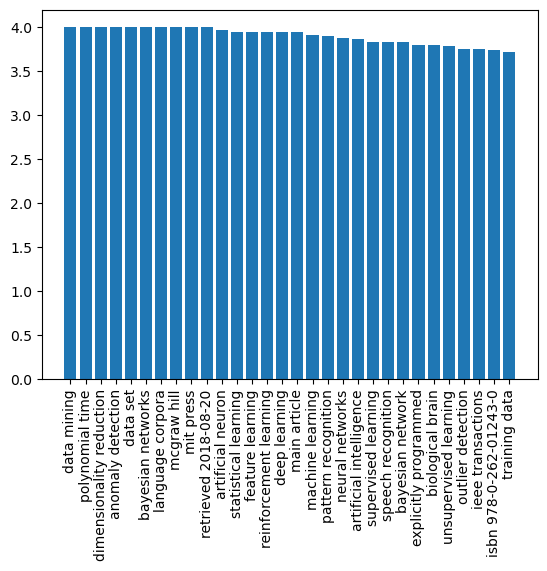

In [9]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res[:30])

มีวิธีที่ดียิ่งขึ้นในการแสดงความถี่ของคำ - โดยใช้ **Word Cloud** เราจะต้องติดตั้งไลบรารีอีกตัวหนึ่งเพื่อสร้าง Word Cloud จากรายการคำสำคัญของเรา


In [71]:
!{sys.executable} -m pip install wordcloud

วัตถุ `WordCloud` มีหน้าที่รับข้อความต้นฉบับ หรือรายการคำที่คำนวณความถี่ไว้ล่วงหน้า และส่งคืนภาพ ซึ่งสามารถแสดงผลได้โดยใช้ `matplotlib`:


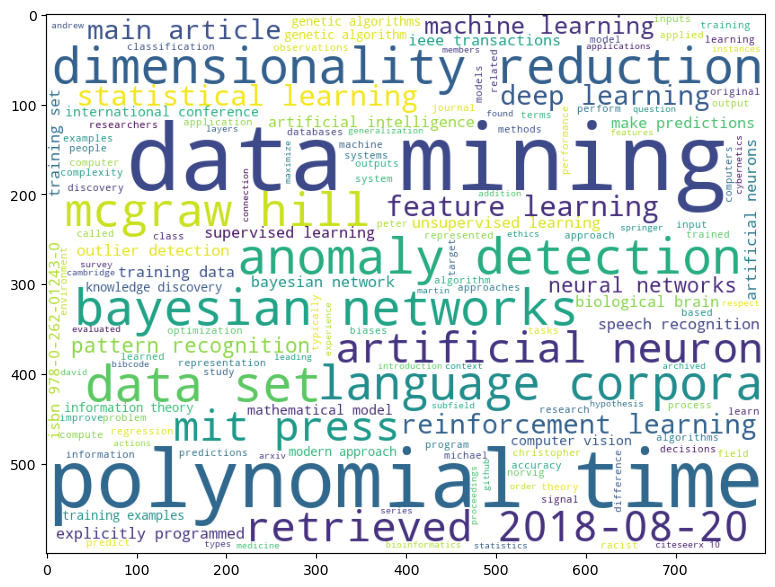

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))
plt.show()

เรายังสามารถส่งข้อความต้นฉบับไปที่ `WordCloud` - มาดูกันว่าเราสามารถได้ผลลัพธ์ที่คล้ายกันหรือไม่:


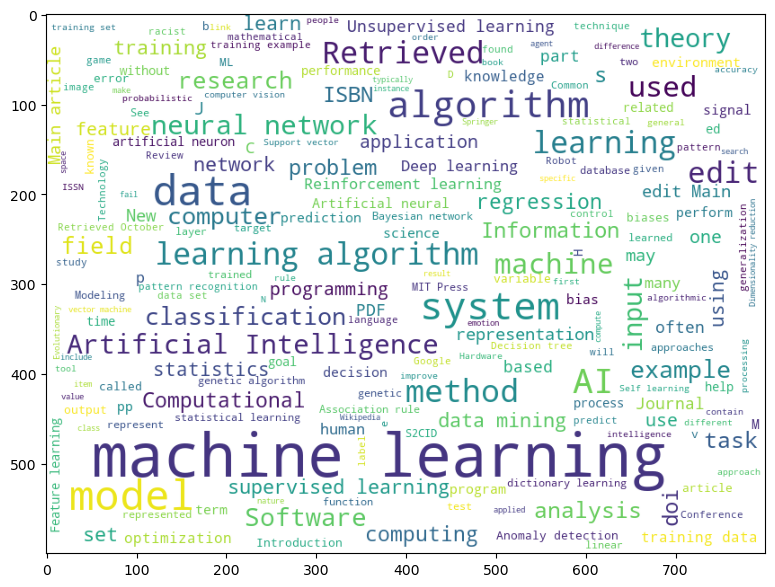

In [13]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))
plt.show()

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

คุณจะเห็นว่า word cloud ตอนนี้ดูน่าประทับใจมากขึ้น แต่ก็ยังมีเสียงรบกวนอยู่มาก (เช่น คำที่ไม่เกี่ยวข้องอย่าง `Retrieved on`) นอกจากนี้ เรายังได้คีย์เวิร์ดที่ประกอบด้วยสองคำ เช่น *data scientist* หรือ *computer science* น้อยลงอีกด้วย นั่นเป็นเพราะอัลกอริทึม RAKE ทำงานได้ดีกว่าในการเลือกคีย์เวิร์ดที่เหมาะสมจากข้อความ ตัวอย่างนี้แสดงให้เห็นถึงความสำคัญของการเตรียมและทำความสะอาดข้อมูล เพราะการมีภาพที่ชัดเจนในตอนท้ายจะช่วยให้เราตัดสินใจได้ดีขึ้น

ในแบบฝึกหัดนี้ เราได้ผ่านกระบวนการง่าย ๆ ในการดึงความหมายบางอย่างจากข้อความใน Wikipedia ในรูปแบบของคีย์เวิร์ดและ word cloud ตัวอย่างนี้ค่อนข้างเรียบง่าย แต่ก็แสดงให้เห็นถึงขั้นตอนทั่วไปทั้งหมดที่นักวิทยาศาสตร์ข้อมูลจะทำเมื่อทำงานกับข้อมูล ตั้งแต่การเก็บข้อมูลไปจนถึงการสร้างภาพ

ในคอร์สของเรา เราจะพูดถึงทุกขั้นตอนเหล่านี้อย่างละเอียด



---

**ข้อจำกัดความรับผิดชอบ**:  
เอกสารนี้ได้รับการแปลโดยใช้บริการแปลภาษา AI [Co-op Translator](https://github.com/Azure/co-op-translator) แม้ว่าเราจะพยายามให้การแปลมีความถูกต้อง แต่โปรดทราบว่าการแปลอัตโนมัติอาจมีข้อผิดพลาดหรือความไม่แม่นยำ เอกสารต้นฉบับในภาษาต้นทางควรถือเป็นแหล่งข้อมูลที่เชื่อถือได้ สำหรับข้อมูลที่สำคัญ ขอแนะนำให้ใช้บริการแปลภาษามนุษย์มืออาชีพ เราจะไม่รับผิดชอบต่อความเข้าใจผิดหรือการตีความที่ผิดพลาดซึ่งเกิดจากการใช้การแปลนี้
